In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('Salary_data_cleaned.csv')

In [35]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,company_txt,job_state,same_state,age,python_yn,r_studio_yn,spark_yn,aws_yn,excel_yn,sql_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,Tecolote Research\n,NM,0,48,1,0,0,0,1,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,University of Maryland Medical System\n,MD,0,37,1,0,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,KnowBe4\n,FL,1,11,1,0,1,0,1,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,PNNL\n,WA,1,56,1,0,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,Affinity Solutions\n,NY,1,23,1,0,0,0,1,1


In [36]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'sql_yn'],
      dtype='object')

In [37]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [38]:
## Job title and seniority 
df['jobs_simplified'] = df['Job Title'].apply(title_simplifier)

In [39]:
df.jobs_simplified.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: jobs_simplified, dtype: int64

In [40]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [41]:
##  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df.desc_len

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [42]:
##  Competitor count
df['number_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '1' else 0)

In [43]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [44]:
## hourly wage to annual 
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)

In [45]:
df[df.hourly == 1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [46]:
df.company_txt

0                          Tecolote Research\n
1      University of Maryland Medical System\n
2                                    KnowBe4\n
3                                       PNNL\n
4                         Affinity Solutions\n
                        ...                   
737                                      GSK\n
738                               Eventbrite\n
739           Software Engineering Institute\n
740                             Numeric, LLC\n
741             Riverside Research Institute\n
Name: company_txt, Length: 742, dtype: object

In [47]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [49]:
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [50]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,r_studio_yn,spark_yn,aws_yn,excel_yn,sql_yn,desc_len,number_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,47.524259,0.528302,0.001348,0.225067,0.237197,0.522911,0.512129,3869.545822,1.673854
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.839080,0.499535,0.036711,0.417908,0.425651,0.499812,0.500190,1521.495868,0.918451
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,1.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,1.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3731.000000,1.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


<AxesSubplot:>

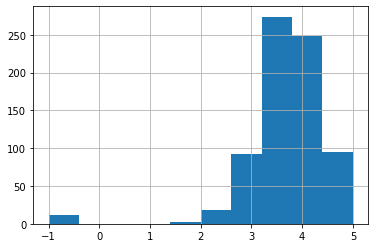

In [51]:
df.Rating.hist()

<AxesSubplot:>

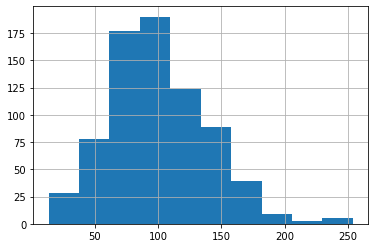

In [52]:
df.avg_salary.hist()

<AxesSubplot:>

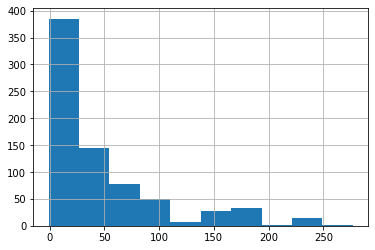

In [53]:
df.age.hist()

<AxesSubplot:>

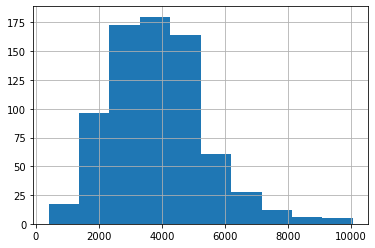

In [54]:
df.desc_len.hist()

<AxesSubplot:>

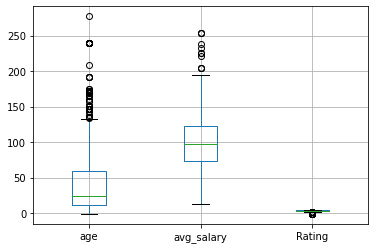

In [56]:
df.boxplot(column = ['age', 'avg_salary', 'Rating'])

In [58]:
df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019574,0.023162,0.164188
avg_salary,0.019574,1.000000,0.013492,0.078808
Rating,0.023162,0.013492,1.000000,-0.012281
desc_len,0.164188,0.078808,-0.012281,1.000000


<AxesSubplot:>

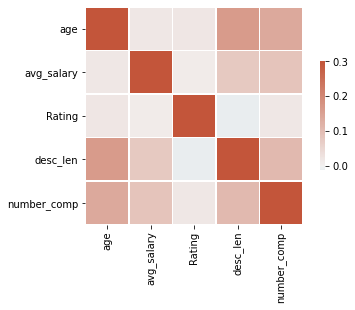

In [68]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(df[['age', 'avg_salary', 'Rating', 'desc_len', 'number_comp']].corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [67]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'sql_yn',
       'jobs_simplified', 'seniority', 'desc_len', 'number_comp'],
      dtype='object')

In [71]:
df_category = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt',
    'job_state', 'same_state', 'python_yn', 'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'sql_yn', 'jobs_simplified', 'seniority'
   ]]

graph for Location: total = 200


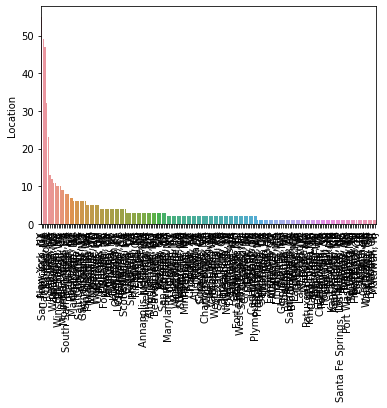

graph for Headquarters: total = 198


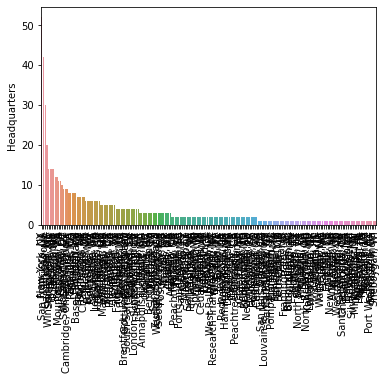

graph for Size: total = 9


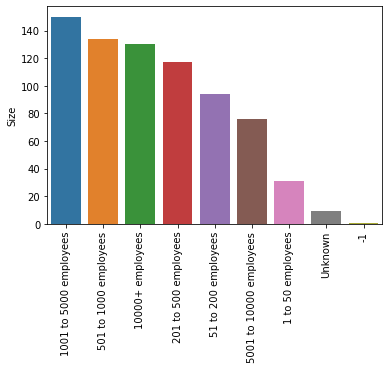

graph for Type of ownership: total = 11


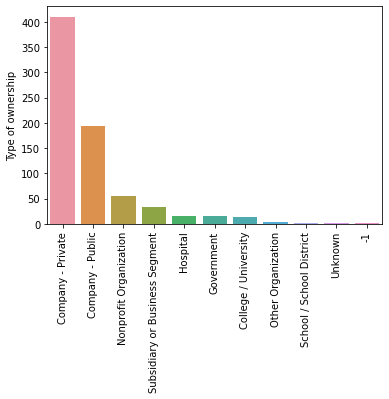

graph for Industry: total = 60


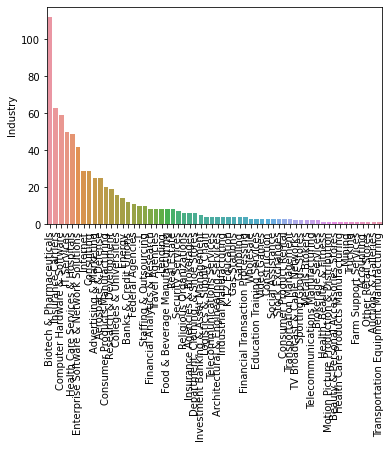

graph for Sector: total = 25


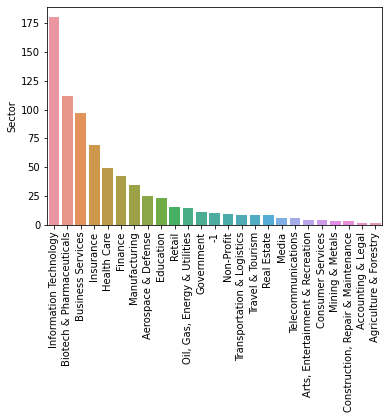

graph for Revenue: total = 14


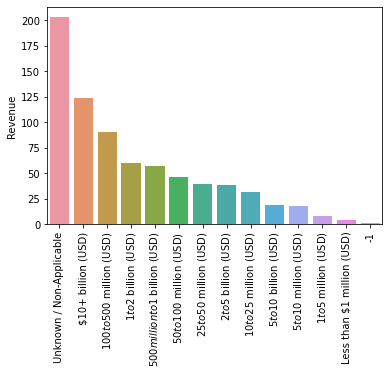

graph for company_txt: total = 343


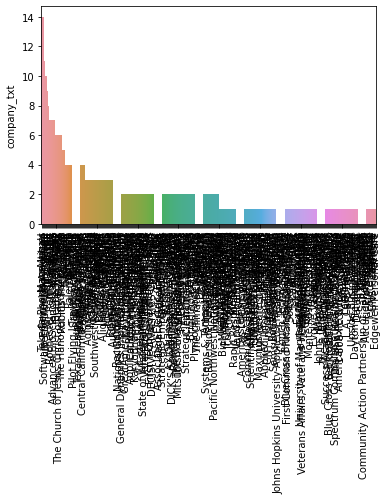

graph for job_state: total = 37


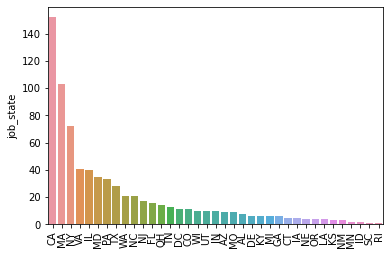

graph for same_state: total = 2


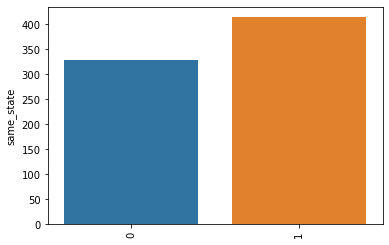

graph for python_yn: total = 2


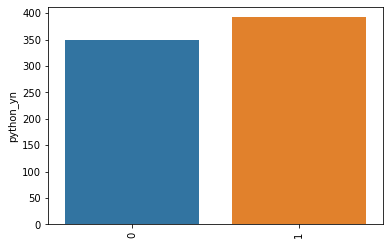

graph for r_studio_yn: total = 2


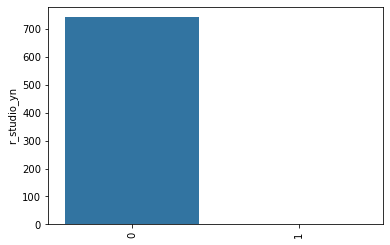

graph for spark_yn: total = 2


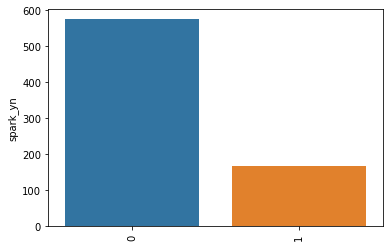

graph for aws_yn: total = 2


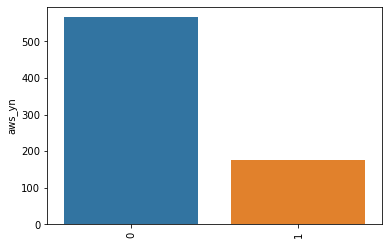

graph for excel_yn: total = 2


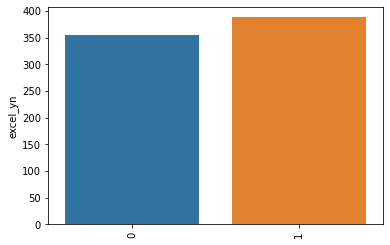

graph for sql_yn: total = 2


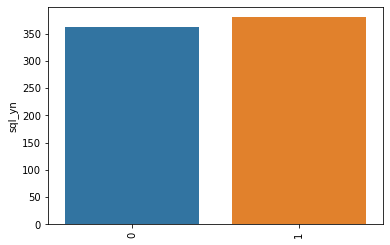

graph for jobs_simplified: total = 7


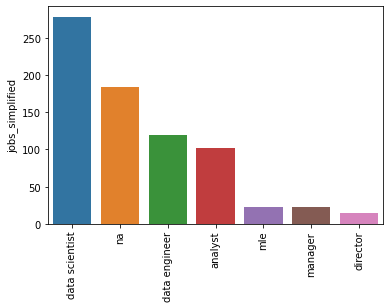

graph for seniority: total = 3


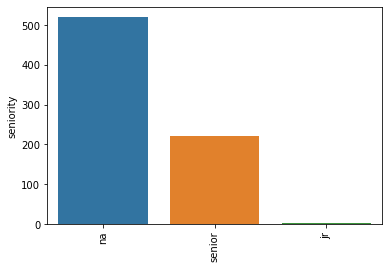

In [79]:
for i in df_category.columns:
    cat_num = df_category[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


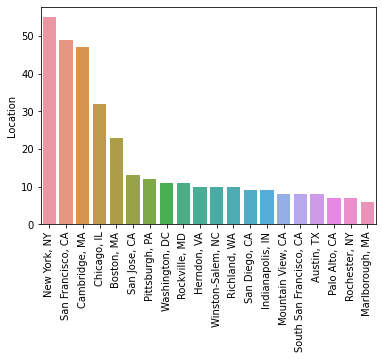

graph for Headquarters: total = 20


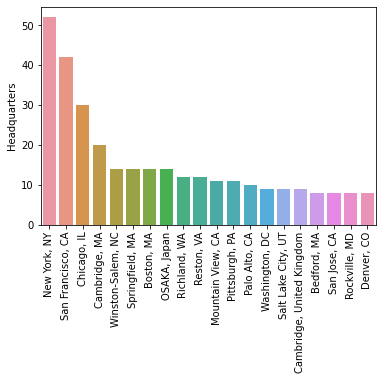

graph for company_txt: total = 20


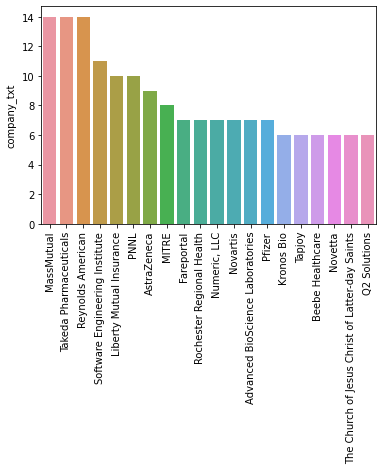

In [87]:
for i in df_category[['Location', 'Headquarters', 'company_txt']].columns:
    cat_num = df_category[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [88]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'sql_yn',
       'jobs_simplified', 'seniority', 'desc_len', 'number_comp'],
      dtype='object')

In [106]:
pd.pivot_table(df, index = ['jobs_simplified', 'seniority'], values = 'avg_salary')

avg_salary
jobs_simplified seniority            
analyst         jr          56.500000
                na          61.155405
                senior      79.092593
data engineer   na          96.701220
                senior     124.689189
data scientist  jr         106.500000
                na         107.043011
                senior     138.956522
director        na         168.607143
manager         na          84.022727
mle             na         119.133333
                senior     142.071429
na              na          73.988189
                senior     109.061404

In [104]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [108]:
pd.pivot_table(df, index = ['job_state', 'jobs_simplified'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state jobs_simplified            
WI        na                        4
          data scientist            3
          analyst                   3
WA        na                        1
          data scientist           17
          analyst                   3
VA        na                        5
          mle                       2
          data scientist           18
          data engineer            10
          analyst                   6
UT        data engineer             3
          analyst                   4
          data scientist            3
TX        na                        7
          data scientist           13
          data engineer             8
TN        data scientist            1
          data engineer            10
          analyst                   2
SC        na                        1
RI        analyst                   1
PA        manager                   3
          data engineer             1
          data scientist            6
          analyst                   8
          mle                       7
          na                        8
OR        data scientist            3
          data engineer             1
OH        na                        3
          data scientist            7
          analyst                   4
NY        na                       12
          mle                       2
          data scientist           40
          data engineer             4
          analyst                  14
NM        data scientist            3
NJ        data scientist            4
          analyst                   6
          data engineer             2
          manager                   2
          director                  2
          na                        1
NE        na                        4
NC        na                       12
          data scientist            3
          data engineer             6
MO        na                        3
          manager                   1
          data scientist            3
          analyst                   2
MN        data engineer             1
          analyst                   1
MI        manager                   2
          data scientist            4
MD        na                       16
          data scientist           13
          data engineer             3
          analyst                   3
MA        na                       46
          manager                   5
          director                  6
          data scientist           30
          data engineer            12
          analyst                   4
LA        analyst                   1
          data engineer             2
          na                        1
KY        na                        4
          data scientist            2
KS        mle                       3
IN        na                        4
          data scientist            2
          data engineer             4
IL        analyst                   3
          na                        6
          mle                       2
          director                  6
          data scientist           15
          data engineer             8
ID        analyst                   2
IA        analyst                   2
          data engineer             3
GA        data scientist            3
          na                        3
FL        data scientist            7
          data engineer             3
          analyst                   6
DE        na                        6
DC        data scientist            5
          data engineer             4
          analyst                   2
CT        na                        3
          data scientist            2
CO        mle                       1
          data engineer             3
          analyst                   1
          na                        3
          data scientist            3
CA        na                       27
          mle                       5
          manager                   9

In [109]:
pd.pivot_table(df[df.jobs_simplified == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)



,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [111]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'sql_yn',
       'jobs_simplified', 'seniority', 'desc_len', 'number_comp'],
      dtype='object')

In [ ]:
#salary by 'Rating', 'Industry', 'Sector', 'Revenue', 'number_comp', 'hourly', 'employer_provided', 'python_yn', 'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'sql_yn', 'desc_len', 'Type of ownership' 

In [117]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'avg_salary', 'number_comp', 'hourly', 'employer_provided', 'python_yn', 'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'sql_yn', 'desc_len', 'Type of ownership' ]]

In [120]:
for i in df_pivots.columns:
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services               131.500000
Br

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [121]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0
